In [1]:
%pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


## EDA

In [2]:
#загрузка бибилиотек
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int')

In [6]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
df.duplicated().sum()

0

    В данных нет пропусков и дубликатов. Все признаки числовые. Среднее значение и медиана не сильно отличаются. Данные без сильных вбросов или их вообще нет.

In [9]:
# рассчет средних показателей по категориям
df_gr_churn = df.groupby('Churn').mean().T
df_gr_churn

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


In [10]:
list_stackedbar = ['Age','Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
list_countplot = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Group_visits']

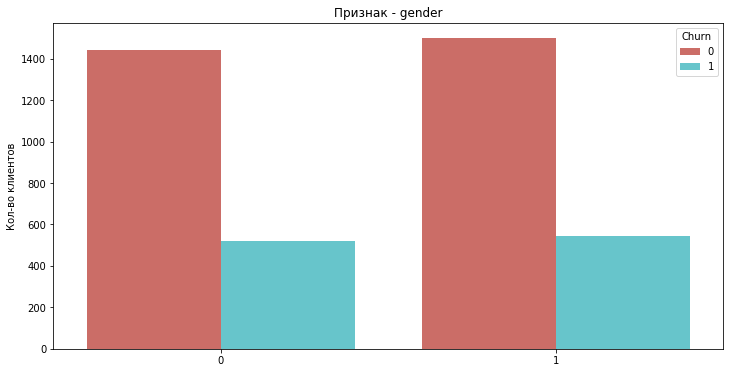

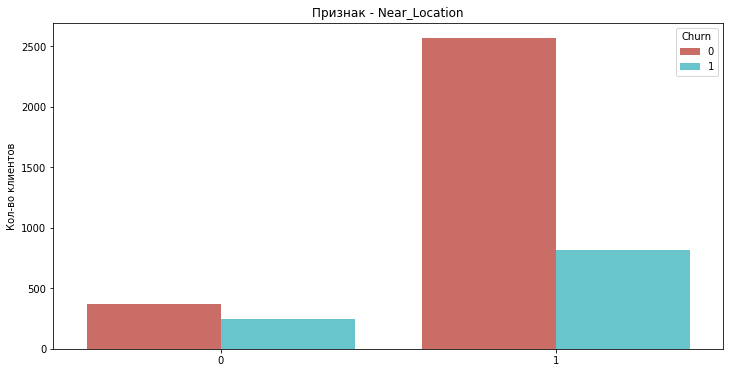

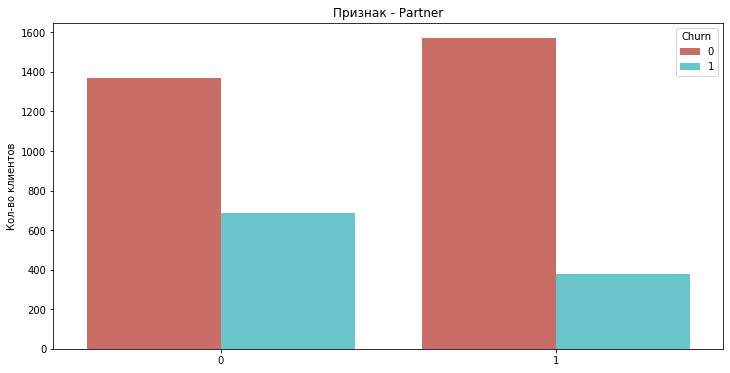

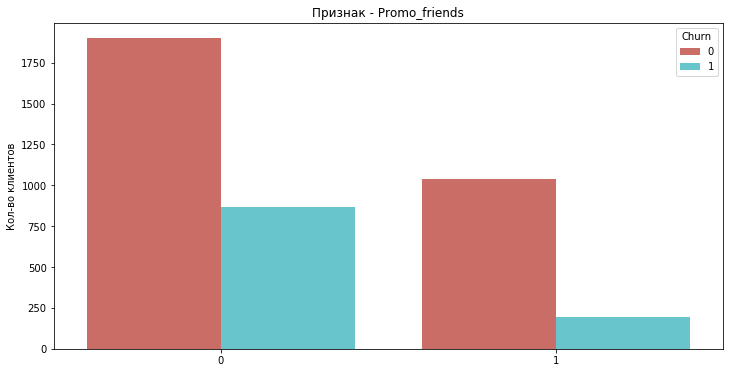

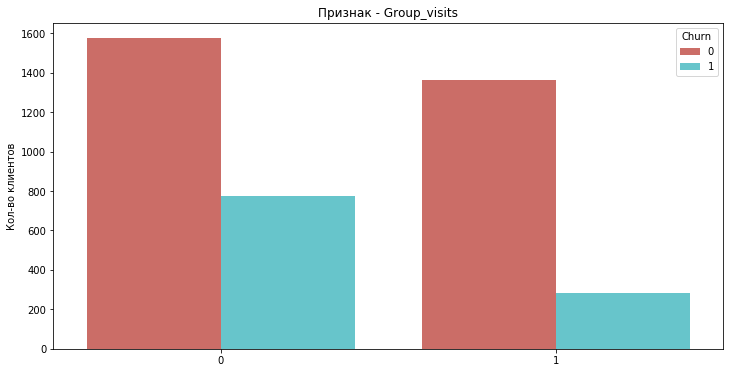

In [11]:
for f in list_countplot:
    fig, ax = plt.subplots(figsize=(12,6))
    g = sns.countplot(data=df, x=df[f], hue='Churn', palette="hls", ax=ax ) 
    plt.title(f'Признак - {f}')
    plt.ylabel("Кол-во клиентов")
    plt.xlabel("")
    #g.fig.set_figwidth(12)
    #g.fig.set_figheight(6)

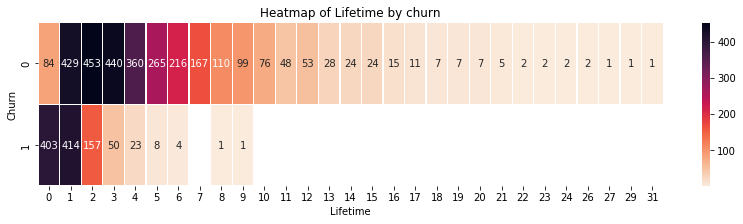

In [12]:
for col in ['Lifetime']:
    fig, ax = plt.subplots(figsize=(14, 3))
    life_data = df.reset_index()\
                .pivot_table(
                    index='Churn',
                    columns=col,
                    values='index',
                    aggfunc='count'
                    )
    sns.heatmap(life_data, cmap='rocket_r', annot=True, fmt='.0f', ax=ax, linewidths=0.25, linecolor='white')
    ax.set_title(f'Heatmap of {col} by churn')
    ax.grid(False)
    plt.show()

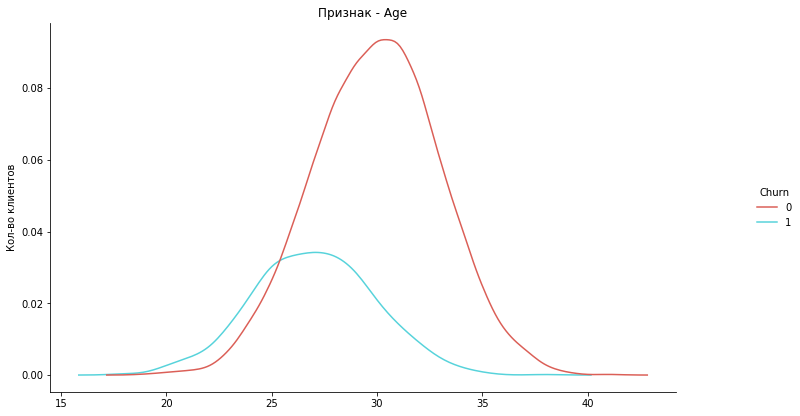

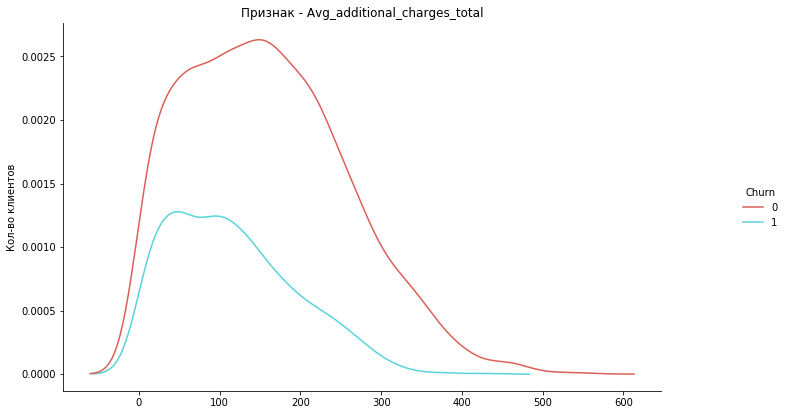

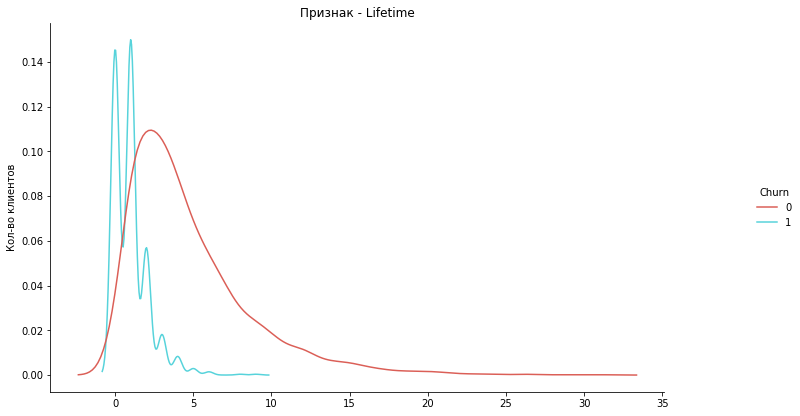

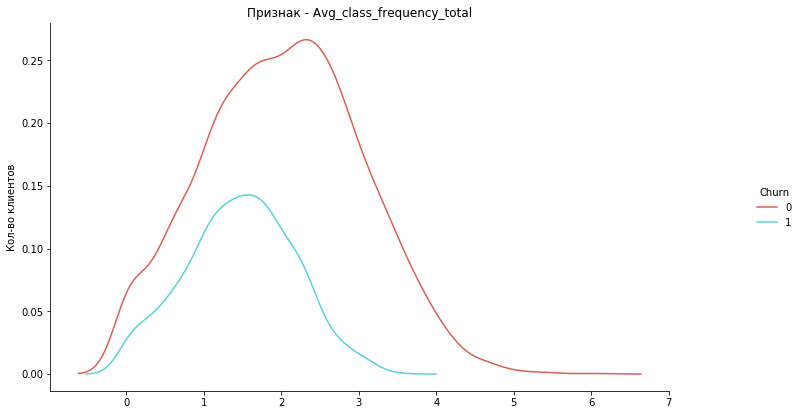

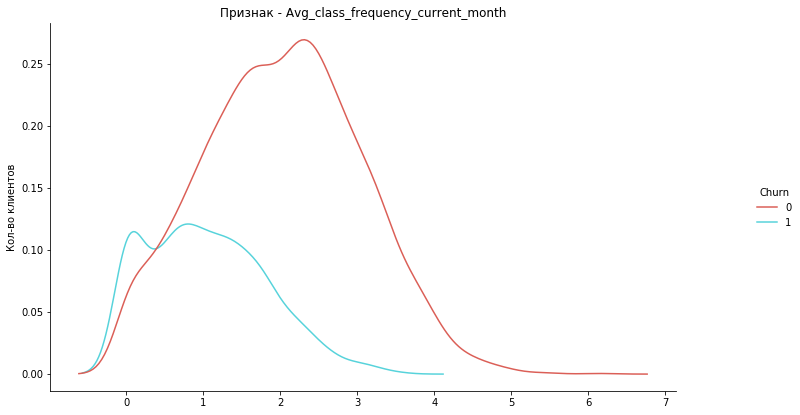

In [13]:
# построение графиков для непрерывных признаков
for f in list_stackedbar:
    g = sns.displot(df, x=df[f], hue='Churn', palette="hls", kind='kde') 
    plt.title(f'Признак - {f}')
    plt.ylabel("Кол-во клиентов")
    plt.xlabel("")
    g.fig.set_figwidth(12)
    g.fig.set_figheight(6)

        Судя по таблице со средними значениями, соотношение полов примерно одинаково в двух категориях (оставшихся и ушедших). Люди, которые живут/работают близко, приходят от партнёров или по промо от друзей чаще остаются. Почти у всех клиентов записан телефон. Люди, которые ушли в отток, имеет более короткий срок действия текущего абонемента, меньше посещают групповые занятия, чуть младше, чем оставшиеся люди. Так же клиенты, которые не попали в отток, в среднем больше тратят на сопутствующие товары, у них больше срок с момента первого посещения. Средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц также больше у группы, которая не попала в отток.
       На графике видно, что возраст имеет нормальное распределение в обоих категориях. А у суммарной выручки от других услуг фитнес-центра и времени с момента первого обращения в фитнес-центр (в месяцах) график скошен вправо.
       Средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц имеют графики, которые также скошены вправо + есть вброс на 0: большое число клиентов не ходило в центр в течение всего периода или последнего месяца.


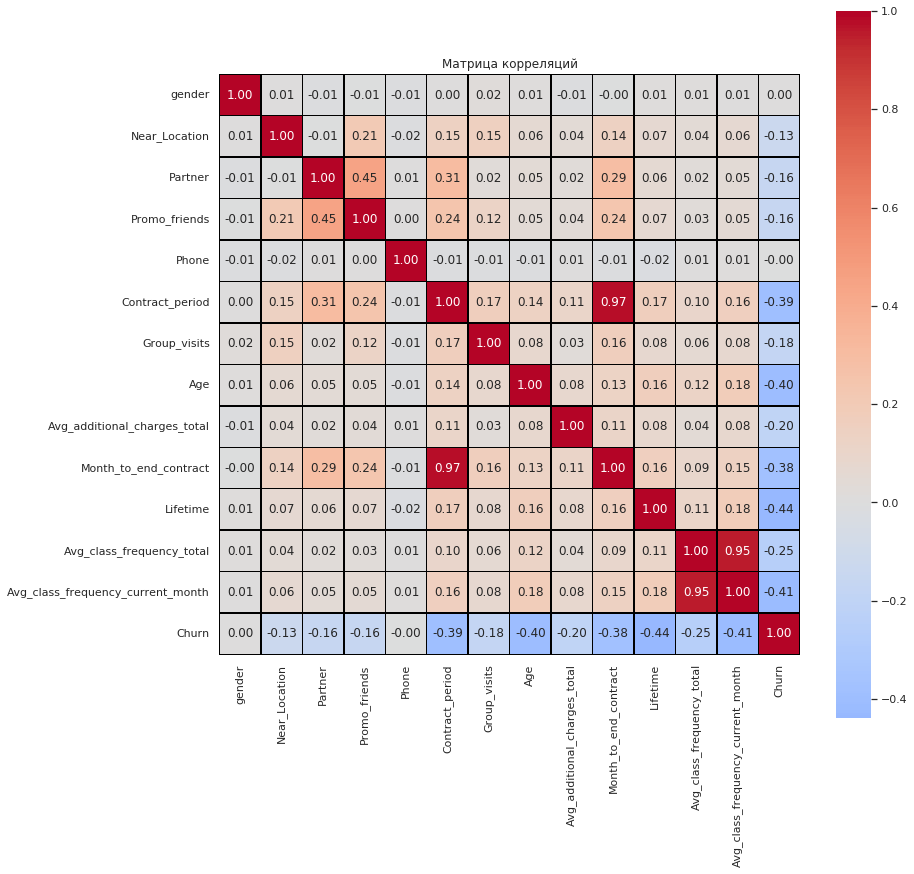

In [14]:
cm = df.corr() # матрица корреляций

#тепловая карта с подписями для матрицы корреляций
sns.set(style='white')
plt.figure(figsize=(13, 13))
plt.title('Матрица корреляций')
sns.heatmap(cm, annot = True, square=True,fmt='.2f', linewidths=0.5, linecolor='black',cmap="coolwarm", center=0)

plt.show()

    Отток имеет обратную корреляцию почти со всеми параметрами, что было видно и по средним значения. Самая большая связь с возрастом (-0.4), временем с момента первого посещения (-0.44), со средней частота посещений в неделю за предыдущий месяц (-0.41). 
    Между сл. парами признаков Contract_period/Month_to_end_contract и Avg_class_frequency_current_month/Avg_class_frequency_total существует сильная корреляция, равная 0.97 и 0.95 соответственно. В первом случае это говорит о том, что много посетителей только недавно приобрели текущий абонемент, а во втором о том, что кол-во посещений в неделю стабильно и прошедший месяц не был аномальным. Можно исключить по признаку из пар после построения основной модели и посмотреть, если улучшения по метрикам. 

## Построение модели прогнозирования оттока клиентов

In [15]:
#разделение на признаки (матрица X) и целевую переменную (y)
X =  df.drop('Churn', axis = 1) 
y = df['Churn']

#ращделение модели на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

    Разделение на выборки проведено случайно, так как в данных нет привязки ко времени.

### Логистическая регрессия

In [16]:
#  модель на основе логистической регрессии 
lr_model = LogisticRegression() 
# обучите модель
lr_model.fit(X_train,y_train)

# пролучение прогноза
lr_predictions = lr_model.predict(X_test) 

# Получение сл. метрик: Accuracy,Precision и Recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [17]:
feature_weights = lr_model.coef_ 
feature_weights

array([[ 0.04777714,  0.05297584, -0.04843903, -0.5684336 ,  0.61130107,
        -0.18896923, -0.71274274, -0.18196326, -0.00467586, -0.06693981,
        -0.97287369,  3.47084952, -4.16197949]])

### Случайный лес

In [18]:
# модель на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучение модели случайного леса
rf_model.fit(X_train, y_train)
# делаем прогнозы
rf_predictions = rf_model.predict(X_test)

# Получение сл. метрик: Accuracy,Precision и Recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


In [19]:
importances = rf_model.feature_importances_ 
importances

array([0.01242526, 0.00942085, 0.01228455, 0.01205345, 0.0061919 ,
       0.06596372, 0.01565161, 0.11912869, 0.09147294, 0.06885504,
       0.27649949, 0.12988274, 0.18016975])

    По всем метрикам можем признать, что и линейная регресси и случайный лес работают корректно. Однако, модель на основе линейной регрессии имеет лучшие показатели. Дальше имеет смысл работать именно с этой моделью. Наиболее важными признаками оказались: Avg_additional_charges_total, Avg_class_frequency_current_month, Lifetime.

### 

In [20]:
df_b = df.drop(['gender', 'Phone'], axis = 1) 
#разделение на признаки (матрица X) и целевую переменную (y)
X_b =  df_b.drop('Churn', axis = 1) 
y_b = df_b['Churn']

#ращделение модели на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_test_st = scaler.transform(X_test)

#### Логистическая регрессия

In [21]:
#  модель на основе логистической регрессии 
lr_model = LogisticRegression() 
# обучите модель
lr_model.fit(X_train_st,y_train)

# пролучение прогноза
lr_predictions = lr_model.predict(X_test_st) 

# Получение сл. метрик: Accuracy,Precision и Recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83


#### Случайный лес

In [22]:
# модель на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучение модели случайного леса
rf_model.fit(X_train_st, y_train)
# делаем прогнозы
rf_predictions = rf_model.predict(X_test_st)

# Получение сл. метрик: Accuracy,Precision и Recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.86
Recall: 0.83


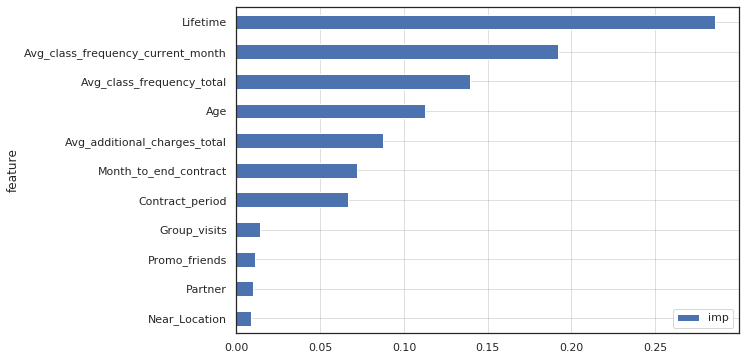

In [23]:
importances_b = rf_model.feature_importances_ 
fig, ax = plt.subplots(figsize=(9, 6))
pd.DataFrame({
    'feature': X_b.columns,
    'imp': importances_b
}).sort_values(by='imp', ascending=True).set_index('feature').plot(kind='barh', ax=ax)
ax.grid(color='grey', alpha=0.5, lw=0.5)

    После стандартизации и исключения признаков с 0 корреляции качество моделей улучшилось и теперь лучщая - случайный лес.

## Кастеризация клиентов

In [24]:
#  стандартизация данных
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# таблица «связок» между объектами
linked = linkage(X_sc, method = 'ward') 

In [ ]:
# построение дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

    При кластеризации алгоритм выделил 4 кластера цветом, однако, визуально можно также поделить на 5 или 6. 

In [ ]:
# модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5,random_state=0)
# прогноз кластеров для наблюдений 
labels = km.fit_predict(X_sc)

# добавление метк кластера в основной датасет
df['cluster'] = labels

# статистика по средним значениям  признаков по кластеру
df.drop('Churn', axis=1).groupby('cluster').mean().T

In [ ]:
df_k = df.drop('Churn', axis=1)
for f in list_countplot:
    fig, ax = plt.subplots(figsize=(14,6))
    g = sns.countplot(data=df_k, x=df_k[f], hue='cluster', palette="hls", ax=ax ) 
    plt.title(f'Признак - {f}')
    plt.ylabel("Кол-во клиентов")
    plt.xlabel("")
    #g.fig.set_figwidth(12)
    #g.fig.set_figheight(6)

In [ ]:
for col in ['Lifetime']:
    fig, ax = plt.subplots(figsize=(14, 3))
    life_data = df_k.reset_index()\
                .pivot_table(
                    index='cluster',
                    columns=col,
                    values='index',
                    aggfunc='count'
                    )
    sns.heatmap(life_data, cmap='rocket_r', annot=True, fmt='.0f', ax=ax, linewidths=0.25, linecolor='white')
    ax.set_title(f'Heatmap of {col} by cluster')
    ax.grid(False)
    plt.show()

In [ ]:
for f in list_stackedbar:
    g = sns.displot(df_k, x=df_k[f], hue='cluster', palette="Spectral" , kind='kde') 
    plt.title(f'Признак - {f}')
    plt.ylabel("Кол-во клиентов")
    plt.xlabel("")
    g.fig.set_figwidth(12)
    g.fig.set_figheight(6)

Женщины и мужчины распределены равномерно по всем кластерам. Во всех кластерах, кроме 2, собраны люди, которым близко до фитнес-центра от дома иди работы. В 0 кластере большая часть клиентов пришла по партнерской программе, в 1 и 2 - около половины, в 3 и 4 - около 35%. В 0 кластере половина пришла по акции. Самый большой срок действия контракта у 0 кластера - 10 мес. Во всех, кроме 4, кластерах у клиентов только начинает действовать абонемент. Возраст в среднем во всех кластерах от 28 до 30 лет. Во всех, кроме 1ого кластера у всех есть телефон. Все группы в среднем тратят от 135 до 162 у.е. Самый большой период с первого посещения прошел у 4 и 0 кластеров - около 5 мес. Средняя частота посещений в неделю за предыдущий месяц у кластеров с 0 по 2 - 2 занятия, у 3 - одно, а у 4 - примерно 3. Средняя частота посещений в неделю за все время с начала действия абонемента равна 2м в 0, 1 и 2 кластерах, одному в 3ем, и трем в 4ом..

In [ ]:
df_gr_k = df.groupby('cluster').agg({'Churn':['count','sum']})
df_gr_k.columns = ['count', 'sum']
df_gr_k['perc_churn'] = df_gr_k['sum']/df_gr_k['count']
df_gr_k

Кластеры 2, 3 и особенно 4 склонны к оттоку, с 44%, 51% и 68% оттока соответственно. Можно считать 0 и 1 кластеры надежными, с 3% и 27% оттока

## Вывод

На основание проведенного анализа можно сделать вывод, что самые перспективные клиенты, что люди, которые входят в 0 кластер. Они среднего возраста обоих полов, которые живут или работают в локации фитнес-центра. Среди таких людей хорошо работают партнерский программы и акция "приведи друга". Если человек купил абонемент на длительный срок шансов, что он уйдет в отток меньше, в данном кластере средний срок текущего контракта равен 11 мес. Учитывая тот факт, что в кластере ср. кол-во месяцев с первого посещения равно примерно 5, а действие контрактов только начинается, можно сделать вывод, что люди попробовали абонемент на более короткий срок, после чего уже купили текущий. Если клиент ходит на групповые занятия и посещает фитнес-центр примерно 2 раза в неделю, то шанс что он уйдет в отток меньше.

Таким образом, стоит сосредоточиться на развитии партнерской сети. Можно более плотно работать с уже действующими партнерами, например, провести внутреннюю акцию или прорекламировать групповые занятия.
Также стоит заключить новые соглашения, особенно перспективны компании, офис которых находится рядом с фитнес-центром. 
Можно обратить внимание на клиентов, у которых уже заканчивается срок действия абонемента, и предложить им новый на более длительный срок со скидкой.
Как видно по программе "пригласи друга" и групповым занятиям, люди охотнее приходят заниматься, когда есть компания, так что можно совершить больше маркетинговых действий, чтобы создать более вовлеченное комьюнити (как вариант через smm).
